In [4]:
import os
files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('.jpg')]
print(files_path)

['/home/pedroigor/visao/visao/aula8/Buildings2.jpg', '/home/pedroigor/visao/visao/aula8/Mountains52.jpg', '/home/pedroigor/visao/visao/aula8/Horses15.jpg', '/home/pedroigor/visao/visao/aula8/Mountains54.jpg', '/home/pedroigor/visao/visao/aula8/Flowers4.jpg', '/home/pedroigor/visao/visao/aula8/Mountains53.jpg', '/home/pedroigor/visao/visao/aula8/Beach2.jpg', '/home/pedroigor/visao/visao/aula8/Horses14.jpg', '/home/pedroigor/visao/visao/aula8/Beach3.jpg', '/home/pedroigor/visao/visao/aula8/Beach1.jpg', '/home/pedroigor/visao/visao/aula8/Buildings1.jpg', '/home/pedroigor/visao/visao/aula8/Buildings3.jpg', '/home/pedroigor/visao/visao/aula8/Buses3.jpg', '/home/pedroigor/visao/visao/aula8/Buses9.jpg', '/home/pedroigor/visao/visao/aula8/Buses10.jpg', '/home/pedroigor/visao/visao/aula8/Flowers2.jpg', '/home/pedroigor/visao/visao/aula8/Flowers1.jpg', '/home/pedroigor/visao/visao/aula8/Horses16.jpg']


In [5]:
diretorio, arquivo = path, filename = os.path.split(files_path[0])
print(arquivo)''

SyntaxError: invalid syntax (<ipython-input-5-6d0bbaa8d3b1>, line 2)

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot

for i in files_path:
    diretorio, arquivo = path, filename = os.path.split(i)
    print(arquivo)
    imagem = cv2.imread(arquivo)
    a = arquivo.split('.')
    imagemEspelhada = imagem[::-1,:,:]
    cv2.imwrite(a[0]+'inv.jpg', imagemEspelhada)
            
#plt.imshow(imagem)
#plt.show()
#plt.imshow(imagemInvertida)


Buildings2.jpg
Mountains52.jpg
Horses15.jpg
Mountains54.jpg
Flowers4.jpg
Mountains53.jpg
Beach2.jpg
Horses14.jpg
Beach3.jpg
Beach1.jpg
Buildings1.jpg
Buildings3.jpg
Buses3.jpg
Buses9.jpg
Buses10.jpg
Flowers2.jpg
Flowers1.jpg
Horses16.jpg


TypeError: Invalid dimensions for image data

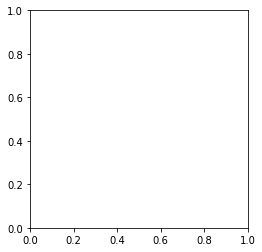

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('jpg')]

def distancia(a, b):
    M = len(a)
    soma = 0
    for i in range(M):
        soma = soma+((a[i]-b[i])**2)
    return np.sqrt(soma)

def lbp(img):
    qtdeLinhas, qtdeColunas = img.shape
    img2 = np.zeros((qtdeLinhas, qtdeColunas))
    for i in range(1, qtdeLinhas-1):
        for j in range(1, qtdeColunas-1):
            A = img[i-1, j]
            B = img[i-1, j+1]
            C = img[i, j+1]
            D = img[i+1, j+1]
            E = img[i+1, j]
            F = img[i+1, j-1]
            G = img[i, j-1]
            H = img[i-1, j-1]
            Centro = img[i,j]
            soma = 0
            if(A > Centro):
                soma = soma + (2**7)
            if(B > Centro):
                soma = soma + (2**6)
            if(C > Centro):
                soma = soma + (2**5)
            if(D > Centro):
                soma = soma + (2**4)
            if(E > Centro):
                soma = soma + (2**3)              
            if(F > Centro):
                soma = soma + (2**2)
            if(G > Centro):
                soma = soma + (2**1)
            if(H > Centro):
                soma = soma
            img2 = soma
        return img2

def histograma_colorido(img):
    WB = np.zeros(256)
    WG = np.zeros(256)
    WR = np.zeros(256)
    qtdeLinhas, qtdeColunas, c = img.shape
    B = img[:,:,0]
    G = img[:,:,1]
    R = img[:,:,2]
    for i in range (qtdeLinhas):
        for j in range (qtdeColunas):
            WB[B[i, j]] = WB[B[i,j]]+1
            WG[G[i, j]] = WG[G[i,j]]+1
            WR[R[i, j]] = WR[R[i,j]]+1
    for i in range(256):
        WB[i] = WB[i]/(qtdeLinhas*qtdeColunas)
        WG[i] = WG[i]/(qtdeLinhas*qtdeColunas)
        WR[i] = WR[i]/(qtdeLinhas*qtdeColunas)
    return np.append(np.append(WB, WG), WR)

def histograma(img):
    W = np.zeros(256)
    qtdeLinhas, qtdeColunas = img.shape
    for i in range (qtdeLinhas):
        for j in range (qtdeColunas):
            W[img[i, j]] = W[img[i,j]]+1
        for i in range(256):
            W[i] = W[i]/(qtdeLinhas*qtdeColunas)
    return W

img = cv2.imread('Beach3.jpg', 0)
img_texture = lbp(img)
hist_consulta = histograma(img)
plt.imshow(img_texture)
d = []
for i in files_path:
    diretorio, arquivo = path, filename = os.path.split(i)
    imagem = cv2.imread(arquivo)
    hist = histograma_colorido(imagem)
    d.append((distancia(hist_consulta, hist), arquivo))
print(sorted(d))

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagemOriginal = cv2.imread('lena.png', 0)

qtdeLinhas, qtdeColunas = imagemOriginal.shape

imagemModificada = np.zeros((qtdeColunas, qtdeLinhas))

for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        imagemModificada[j,i] = imagemOriginal[i,j]
                
plt.gray()               
plt.imshow(imagemOriginal)
plt.show()          
plt.imshow(imagemModificada)

AttributeError: 'NoneType' object has no attribute 'shape'